In [45]:
import requests

In [46]:
url="https://en.wikipedia.org/wiki/Human_body_weight"

In [47]:
response=requests.get(url,headers={"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36"})

In [48]:
response.status_code

200

In [49]:
response.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Human body weight - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-

In [50]:
from bs4 import BeautifulSoup

In [51]:
out=BeautifulSoup(response.text,"html.parser")

In [52]:
out

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Human body weight - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feat

In [53]:
l=out.findAll("table",{"class":"wikitable"})[0]

In [54]:
import pandas as pd

In [55]:
df=pd.read_html(str(l))[0]

In [56]:
df.head()

,Region,Adult population (millions),Average weight,% Overweight,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref
0,Africa,535,60.7 kg (133.8 lb),28.9%,[11]
1,Asia,2815,57.7 kg (127.2 lb),24.2%,[11]
2,Europe,606,70.8 kg (156.1 lb),55.6%,[11]
3,Latin America and the Caribbean,386,67.9 kg (149.7 lb),57.9%,[11]
4,North America,263,80.7 kg (177.9 lb),73.9%,[11]


In [57]:
df.columns

Index(['Region', 'Adult population (millions)', 'Average weight',
       '% Overweight',
       '.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref'],
      dtype='object')

In [58]:
df.drop(".mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref",axis=1,inplace=True)

In [59]:
df.head()

,Region,Adult population (millions),Average weight,% Overweight
0,Africa,535,60.7 kg (133.8 lb),28.9%
1,Asia,2815,57.7 kg (127.2 lb),24.2%
2,Europe,606,70.8 kg (156.1 lb),55.6%
3,Latin America and the Caribbean,386,67.9 kg (149.7 lb),57.9%
4,North America,263,80.7 kg (177.9 lb),73.9%


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Region                       7 non-null      object
 1   Adult population (millions)  7 non-null      int64 
 2   Average weight               7 non-null      object
 3   % Overweight                 7 non-null      object
dtypes: int64(1), object(3)
memory usage: 352.0+ bytes


**Data Cleaning**

In [61]:
df['Average weight']

0    60.7 kg (133.8 lb)
1    57.7 kg (127.2 lb)
2    70.8 kg (156.1 lb)
3    67.9 kg (149.7 lb)
4    80.7 kg (177.9 lb)
5    74.1 kg (163.4 lb)
6    62.0 kg (136.7 lb)
Name: Average weight, dtype: object

In [62]:
a='60.7 kg (133.8 lb)'

In [63]:
a.split('(')[0]

'60.7 kg '

In [64]:
import re

In [65]:
float(re.findall("\d+\.\d+",a.split('(')[0])[0])

60.7

In [66]:
df['Average weight (kg)']=df['Average weight'].apply(lambda x:float(re.findall("\d+\.\d+",x.split('(')[0])[0]))

In [67]:
df.head()

,Region,Adult population (millions),Average weight,% Overweight,Average weight (kg)
0,Africa,535,60.7 kg (133.8 lb),28.9%,60.7
1,Asia,2815,57.7 kg (127.2 lb),24.2%,57.7
2,Europe,606,70.8 kg (156.1 lb),55.6%,70.8
3,Latin America and the Caribbean,386,67.9 kg (149.7 lb),57.9%,67.9
4,North America,263,80.7 kg (177.9 lb),73.9%,80.7


In [68]:
df['Average weight (lbs)']=df['Average weight'].apply(lambda x:float(re.findall("\d+\.\d+",x.split('(')[1])[0]))

In [69]:
df.head()

,Region,Adult population (millions),Average weight,% Overweight,Average weight (kg),Average weight (lbs)
0,Africa,535,60.7 kg (133.8 lb),28.9%,60.7,133.8
1,Asia,2815,57.7 kg (127.2 lb),24.2%,57.7,127.2
2,Europe,606,70.8 kg (156.1 lb),55.6%,70.8,156.1
3,Latin America and the Caribbean,386,67.9 kg (149.7 lb),57.9%,67.9,149.7
4,North America,263,80.7 kg (177.9 lb),73.9%,80.7,177.9


In [70]:
df.columns

Index(['Region', 'Adult population (millions)', 'Average weight',
       '% Overweight', 'Average weight (kg)', 'Average weight (lbs)'],
      dtype='object')

In [71]:
df.drop('Average weight',axis=1,inplace=True)

In [75]:
df.rename({'Adult population (millions)':'Adult Population (M)','% Overweight':'Overweight (%)'},inplace=True,axis=1)

In [76]:
df.head()

,Region,Adult Population (M),Overweight (%),Average weight (kg),Average weight (lbs)
0,Africa,535,28.9%,60.7,133.8
1,Asia,2815,24.2%,57.7,127.2
2,Europe,606,55.6%,70.8,156.1
3,Latin America and the Caribbean,386,57.9%,67.9,149.7
4,North America,263,73.9%,80.7,177.9


In [77]:
df['Overweight (%)']=df['Overweight (%)'].apply(lambda x:float(x.split('%')[0]))

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Region                7 non-null      object 
 1   Adult Population (M)  7 non-null      int64  
 2   Overweight (%)        7 non-null      float64
 3   Average weight (kg)   7 non-null      float64
 4   Average weight (lbs)  7 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 408.0+ bytes


In [80]:
df

,Region,Adult Population (M),Overweight (%),Average weight (kg),Average weight (lbs)
0,Africa,535,28.9,60.7,133.8
1,Asia,2815,24.2,57.7,127.2
2,Europe,606,55.6,70.8,156.1
3,Latin America and the Caribbean,386,57.9,67.9,149.7
4,North America,263,73.9,80.7,177.9
5,Oceania,24,63.3,74.1,163.4
6,World,4630,34.7,62.0,136.7


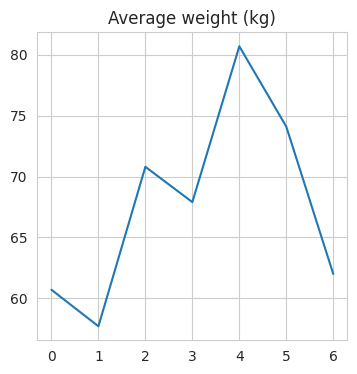

In [93]:
from matplotlib import pyplot as plt
df['Average weight (kg)'].plot(figsize=(4, 4), title='Average weight (kg)')
plt.show()

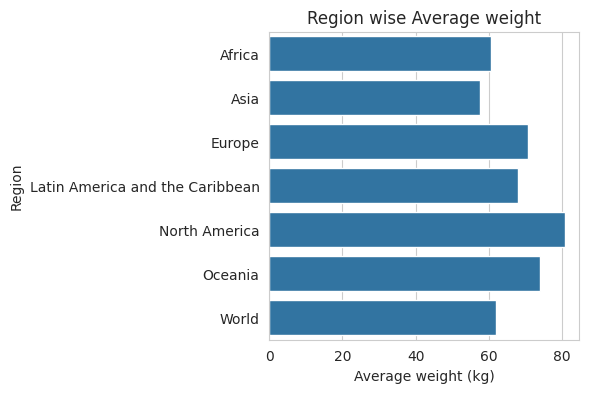

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.title("Region wise Average weight")
sns.barplot(y=df['Region'],x=df['Average weight (kg)'])
plt.show()